# PCA Implementation with cnn-sign-language-mnist dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('sign_mnist_train.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#daraset : https://www.kaggle.com/code/asiyebayraktar/cnn-sign-language-mnist/input
df = pd.read_csv('sign_mnist_train.csv')

In [3]:
df

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          3     107     118     127     134     139     143     146     150   
1          6     155     157     156     156     156     157     156     158   
2          2     187     188     188     187     187     186     187     188   
3          2     211     211     212     212     211     210     211     210   
4         13     164     167     170     172     176     179     180     184   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
27450     13     189     189     190     190     192     193     193     193   
27451     23     151     154     157     158     160     161     163     164   
27452     18     174     174     174     174     174     175     175     174   
27453     17     177     181     184     185     187     189     190     191   
27454     23     179     180     180     180     182     181     182     183   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0         153  ...       207       207       207       207       206   
1         158  ...        69       149       128        87        94   
2         187  ...       202       201       200       199       198   
3         210  ...       235       234       233       231       230   
4         185  ...        92       105       105       108       133   
...       ...  ...       ...       ...       ...       ...       ...   
27450     193  ...       132       165        99        77        52   
27451     166  ...       198       198       198       198       198   
27452     173  ...       121       196       209       208       206   
27453     191  ...       119        56        27        58       102   
27454     182  ...       108       132       170       194       214   

       pixel780  pixel781  pixel782  pixel783  pixel784  
0           206       206       204       203       202  
1           163       175       103       135       149  
2           199       198       195       194       195  
3           226       225       222       229       163  
4           163       157       163       164       179  
...         ...       ...       ...       ...       ...  
27450       200       234       200       222       225  
27451       196       195       195       195       194  
27452       204       203       202       200       200  
27453        79        47        64        87        93  
27454       203       197       205       209       215  

[27455 rows x 785 columns]

In [4]:
## print shape of dataset with  rows and columns
df.shape

(27455, 785)

In [5]:
df.sample()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
7281     23     159     163     165     168     173     177     182     184   

      pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
7281     187  ...       234       237       238       239       239       239   

      pixel781  pixel782  pixel783  pixel784  
7281       238       238       236       236  

[1 rows x 785 columns]

In [6]:
## print the top5 records
df.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 785 columns]

In [7]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 2),  ' % missing values')

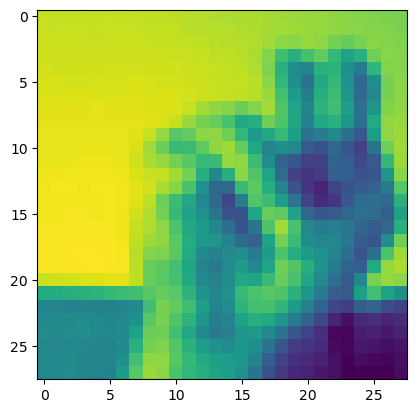

In [8]:
#re plot sample image
import matplotlib.pyplot as plt
plt.imshow(df.iloc[14176,1:].values.reshape(28,28))

In [9]:
#separating features and labels
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [10]:
#Applying hold out method in 20/80
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=42)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("y_train",y_train.shape)
print("y_test",y_test.shape)

X_train (21964, 784)
X_test (5491, 784)
y_train (21964,)
y_test (5491,)


In [11]:
#Applying KNN CLASSIFIER to predict test data
from sklearn.neighbors import KNeighborsClassifier
knn =KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(y_test, y_pred))

Accuracy 0.9959934438171554


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [12]:
#to apply PCA first apply standard scaler to transform data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
#Apply PCA initially for 200 component's 
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)
print("X_train_trf",X_train_trf.shape)
print("X_test_trf",X_test_trf.shape)

X_train_trf (21964, 200)
X_test_trf (5491, 200)


In [14]:
#now apply KNN again on PCA components data

knn =KNeighborsClassifier()
knn.fit(X_train_trf, y_train)
y_pred = knn.predict(X_test_trf)
print("Accuracy PCA",accuracy_score(y_test, y_pred))

Accuracy PCA 0.9947186304862502


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [ ]:
#with loop you can apply pca to each column
for i in range(1, 785):
    pca = PCA(n_components=i)
    X_train_trf=pca.fit_transform(X_train)
    X_test_trf=pca.transform(X_test)
    knn =KNeighborsClassifier()
    knn.fit(X_train_trf, y_train)
    y_pred = knn.predict(X_test_trf)
    print(accuracy_score(y_test, y_pred))

In [16]:
#plot the graph to check variance
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [17]:
#pca explained variance will always be higher for first value then it dcrease
pca.explained_variance_

array([2.79539237e+02, 6.56543250e+01, 5.50681337e+01, 3.85781749e+01,
       2.85754901e+01, 2.07679396e+01, 2.00105590e+01, 1.60006878e+01,
       1.43029723e+01, 1.27491453e+01, 1.08378981e+01, 1.01703450e+01,
       8.83427619e+00, 8.00027883e+00, 7.01572665e+00, 6.39993668e+00,
       5.86525045e+00, 5.57022130e+00, 5.34652510e+00, 4.70853045e+00,
       4.35849322e+00, 3.97633666e+00, 3.86393325e+00, 3.72310925e+00,
       3.40945708e+00, 3.16118662e+00, 3.04880420e+00, 2.83294690e+00,
       2.68125707e+00, 2.64801862e+00, 2.52917427e+00, 2.48028048e+00,
       2.41161499e+00, 2.32127519e+00, 2.23273309e+00, 2.18038347e+00,
       2.06531331e+00, 2.04154596e+00, 1.96143170e+00, 1.91721035e+00,
       1.86634876e+00, 1.74237493e+00, 1.69180873e+00, 1.65151159e+00,
       1.62766050e+00, 1.58091920e+00, 1.53332410e+00, 1.48550941e+00,
       1.44536614e+00, 1.39568497e+00, 1.36832064e+00, 1.35121312e+00,
       1.31431608e+00, 1.25938691e+00, 1.20402259e+00, 1.19146264e+00,
      

In [18]:
pca.components_.shape

(650, 784)

In [19]:
pca.explained_variance_ratio_ #need to take 90% of data

array([3.56538915e-01, 8.37389487e-02, 7.02367685e-02, 4.92046154e-02,
       3.64466697e-02, 2.64885128e-02, 2.55225102e-02, 2.04081114e-02,
       1.82427565e-02, 1.62609246e-02, 1.38232202e-02, 1.29717882e-02,
       1.12676964e-02, 1.02039727e-02, 8.94822351e-03, 8.16281288e-03,
       7.48084619e-03, 7.10455063e-03, 6.81923684e-03, 6.00550520e-03,
       5.55904946e-03, 5.07162707e-03, 4.92826190e-03, 4.74864763e-03,
       4.34859931e-03, 4.03194222e-03, 3.88860382e-03, 3.61328816e-03,
       3.41981504e-03, 3.37742100e-03, 3.22584071e-03, 3.16347902e-03,
       3.07589947e-03, 2.96067539e-03, 2.84774418e-03, 2.78097474e-03,
       2.63420826e-03, 2.60389415e-03, 2.50171225e-03, 2.44531002e-03,
       2.38043850e-03, 2.22231581e-03, 2.15782105e-03, 2.10642398e-03,
       2.07600306e-03, 2.01638676e-03, 1.95568149e-03, 1.89469614e-03,
       1.84349533e-03, 1.78012937e-03, 1.74522748e-03, 1.72340765e-03,
       1.67634724e-03, 1.60628772e-03, 1.53567318e-03, 1.51965356e-03,
      

In [20]:
pca.components_

array([[-0.04769596, -0.04914705, -0.05059328, ..., -0.01847575,
        -0.01715696, -0.01597225],
       [ 0.05415085,  0.05208143,  0.04969027, ...,  0.01472052,
         0.01069226,  0.00819213],
       [ 0.01587315,  0.01618099,  0.01913721, ..., -0.08870565,
        -0.0876539 , -0.08526078],
       ...,
       [-0.00202845, -0.02858416, -0.01758349, ...,  0.05896514,
        -0.03657354,  0.00903987],
       [-0.03239761,  0.04865103,  0.02417109, ..., -0.01087032,
         0.05239058, -0.02488848],
       [-0.03125046,  0.0482934 , -0.02255818, ..., -0.03515288,
         0.03438371, -0.00813268]])

In [21]:
#cumalative frequency

import numpy as np
np.cumsum(pca.explained_variance_ratio_)

array([0.35653892, 0.44027786, 0.51051463, 0.55971925, 0.59616592,
       0.62265443, 0.64817694, 0.66858505, 0.68682781, 0.70308873,
       0.71691195, 0.72988374, 0.74115144, 0.75135541, 0.76030363,
       0.76846645, 0.77594729, 0.78305184, 0.78987108, 0.79587659,
       0.80143564, 0.80650726, 0.81143552, 0.81618417, 0.82053277,
       0.82456471, 0.82845332, 0.83206661, 0.83548642, 0.83886384,
       0.84208968, 0.84525316, 0.84832906, 0.85128974, 0.85413748,
       0.85691845, 0.85955266, 0.86215656, 0.86465827, 0.86710358,
       0.86948402, 0.87170633, 0.87386415, 0.87597058, 0.87804658,
       0.88006297, 0.88201865, 0.88391335, 0.88575684, 0.88753697,
       0.8892822 , 0.89100561, 0.89268195, 0.89428824, 0.89582391,
       0.89734357, 0.89880947, 0.90024696, 0.90166318, 0.90306761,
       0.90446065, 0.90581454, 0.90715029, 0.90842547, 0.90968089,
       0.91090723, 0.91212337, 0.91330083, 0.9144609 , 0.91560629,
       0.91672889, 0.9178416 , 0.91891919, 0.91998401, 0.92104

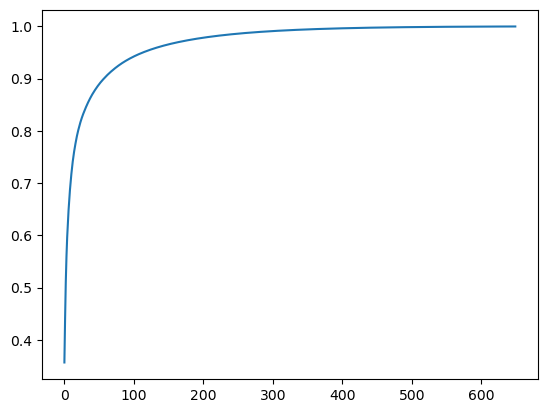

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))